<a href="https://colab.research.google.com/github/Subhansh47/alma-better_airbnb/blob/main/Airbnb_Bookings_Analysis_Refined_by_Subhansh_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Understanding Airbnb and Its Impact**

Since its inception in 2008, Airbnb has revolutionized the travel industry by offering a unique, personalized alternative to traditional accommodations. Today, Airbnb operates globally, providing travelers with millions of lodging options. The vast amount of data generated from these listings offers valuable insights for security, business decisions, customer behavior, host performance, marketing strategies, and service innovations.

This dataset contains approximately 49,000 observations across 16 columns, including both categorical and numerical values.

**Key Areas of Exploration in This Analysis:**
- Understanding different hosts and their impact on various areas.
- Extracting insights from pricing, location, reviews, and booking patterns.
- Identifying the busiest hosts and their potential strategies.
- Analyzing traffic differences across regions and possible reasons behind them.

## **What is Airbnb?**

Airbnb is an online marketplace that connects property owners (hosts) with travelers seeking short-term lodging. It provides accommodations ranging from apartments and homestays to hotel rooms and unique stays.

This analysis delves into Airbnb's dataset to uncover trends and insights that influence pricing, demand, and host strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install gdown if you don't have it
!pip install gdown

# Download the file using the extracted file ID
import gdown

file_id = '1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(url, 'downloaded_file.extension', quiet=False)  # Change the extension accordingly


Downloading...
From: https://drive.google.com/uc?export=download&id=1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou
To: /content/downloaded_file.extension
100%|██████████| 7.08M/7.08M [00:00<00:00, 127MB/s]


'downloaded_file.extension'

In [ ]:
import pandas as pd

# Load the CSV file (adjust the filename accordingly)
df = pd.read_csv('downloaded_file.extension')  # Change the filename and extension
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Ok, so we can see our dataset has 48895 data and 16 columns. Lets try to understand about the columns we've got here.
* id : a unique id identifying an airbnb lisitng
* name : name representing the accommodation
* host_id : a unique id identifying an airbnb host
* host_name : name under whom host is registered
* neighbourhood_group : a group of area
* neighbourhood : area falls under neighbourhood_group
* latitude : coordinate of listing
* longitude : coordinate of listing
* room_type : type to categorize listing rooms
* price : price of listing
* minimum_nights : the minimum nights required to stay in a single visit
* number_of_reviews : total count of reviews given by visitors
* last_review : date of last review given
* reviews_per_month : rate of reviews given per month
* calculated_host_listings_count : total no of listing registered under the host
* availability_365 : the number of days for which a host is available in a year.

latitude and longitude has represented a co-ordinate, neighbourhood_group, neighbourhood and room_type are columns of categorical type. last_review is a column of date type, we will convert it as required.

We can check there are 4 columns containing null values which are name, host_name (looks like listing name and host_name doesn't really matter to us for now) and last_reviews, reviews_per_month (obviously, if a listing has never received a review, its possible and valid). So we will just ```fillna(0)``` to those null values

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
# we're excluding lat long as they are coordinate, id & host_id as they're unique id

col_after_excluding = list(set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'})


df[col_after_excluding].describe()


,price,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,1.090910,23.274466,7.143982,112.781327,7.029962
std,240.154170,1.597283,44.550582,32.952519,131.622289,20.510550
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,69.000000,0.040000,1.000000,1.000000,0.000000,1.000000
50%,106.000000,0.370000,5.000000,1.000000,45.000000,3.000000
75%,175.000000,1.580000,24.000000,2.000000,227.000000,5.000000
max,10000.000000,58.500000,629.000000,327.000000,365.000000,1250.000000


In [ ]:
dist_col_list = df[col_after_excluding].describe().columns.tolist()

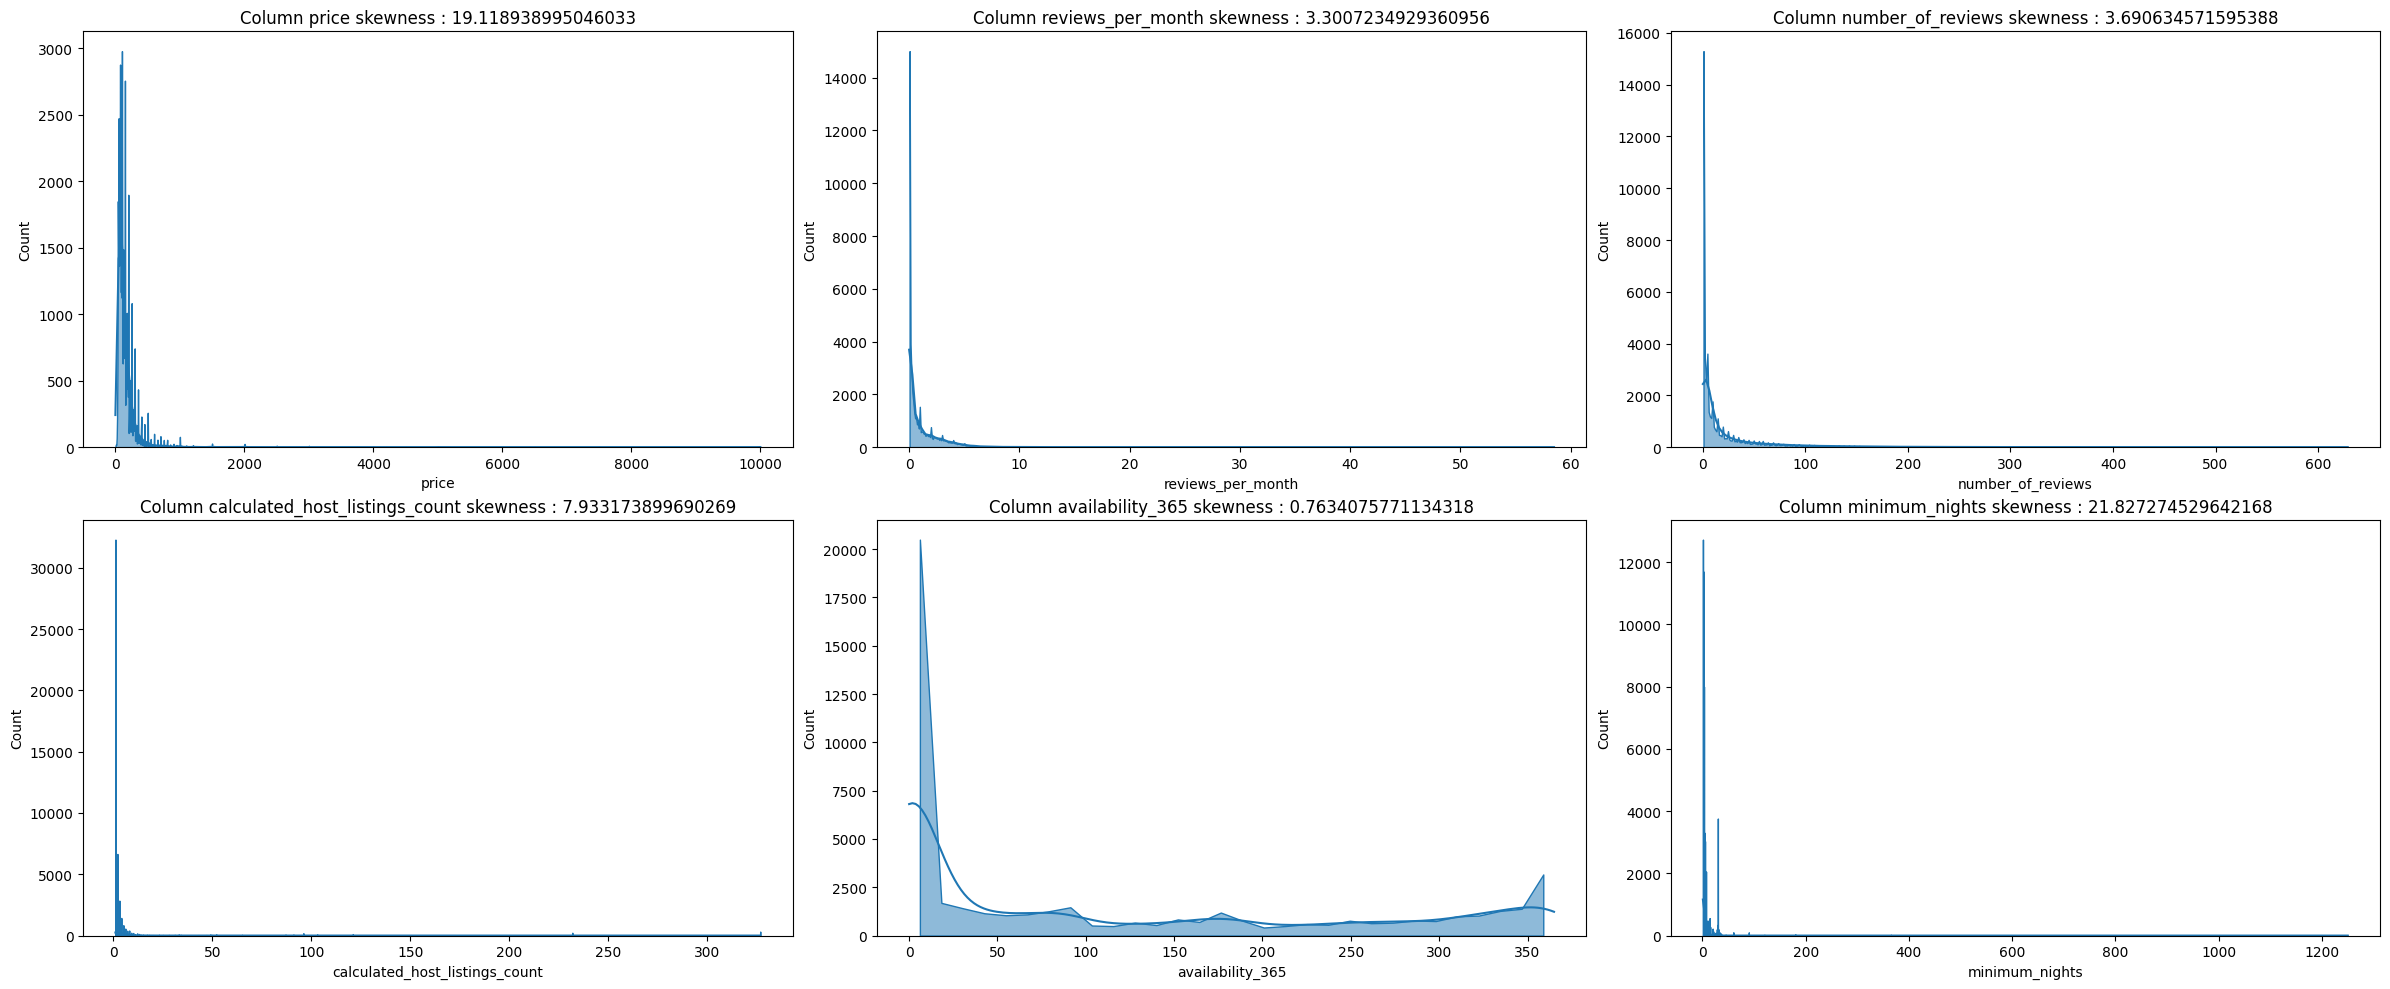

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(dist_col_list, axes):
    sns.histplot(x=col, data=df, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {df[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

From the distribution of filtered numerical data columns, it can be concluded that all these has a positive skewed distribution including price. However, availability distributed uniformly throughout days of a year, so it means we have all sort of listing available uniformly throughout the year.

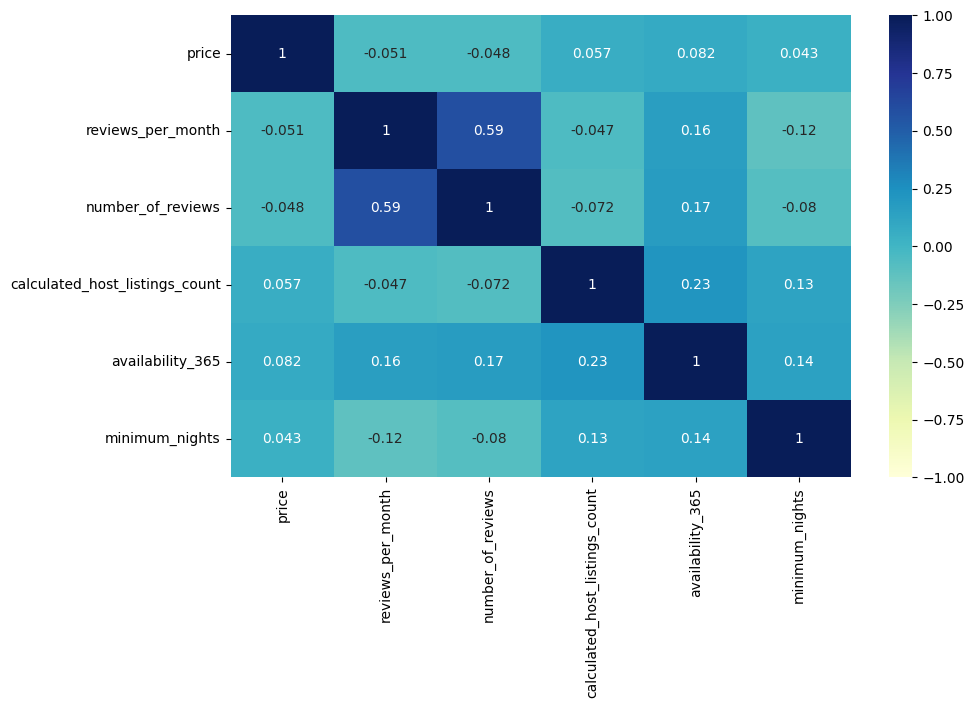

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

no_of_reviews and reviews_per_month has high co-relation for obvious reason. But the price column also has very low corelation with other features. Let check it how it differes or related.

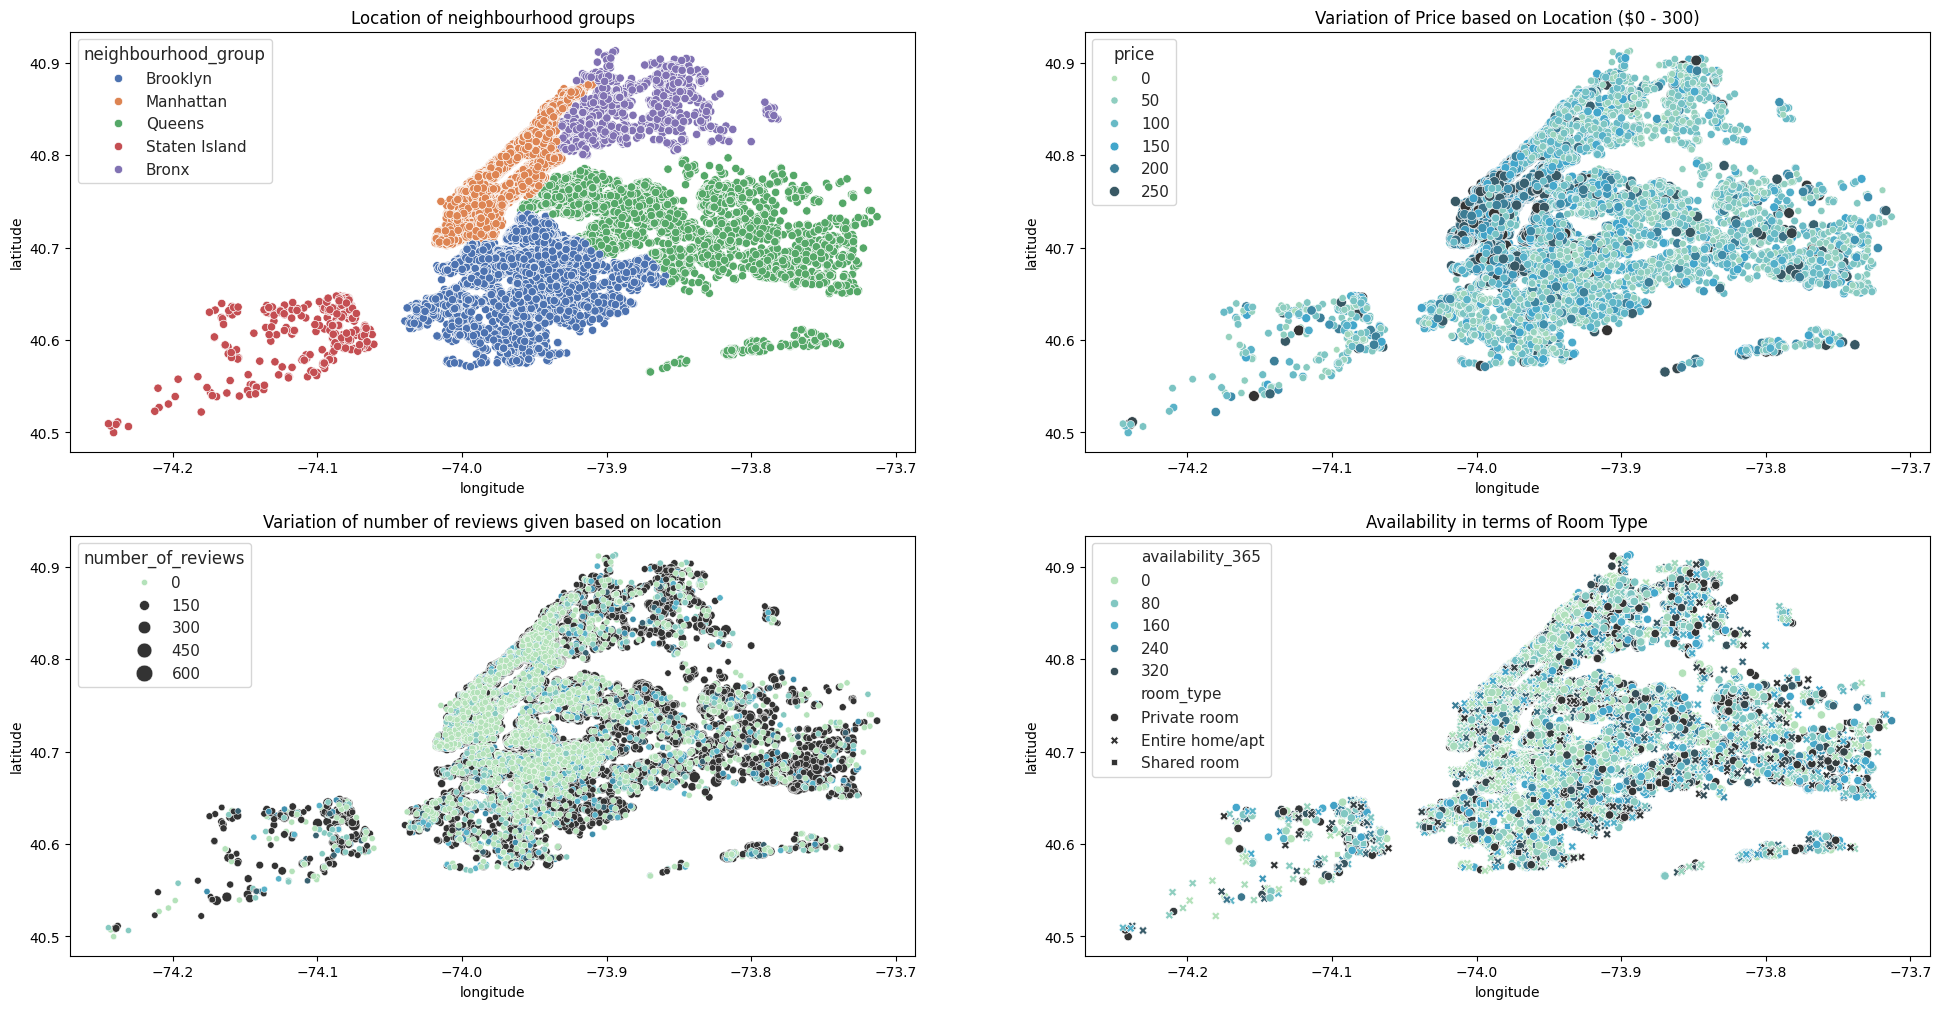

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
ax = axes.flatten()

sns.set_theme(style="white")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[0]);
ax[0].set_title('Location of neighbourhood groups')
sns.scatterplot(data=df[df['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='GnBu_d', ax=ax[1])
ax[1].set_title('Variation of Price based on Location ($0 - 300)')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[2])
ax[2].set_title('Variation of number of reviews given based on location')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[3])
ax[3].set_title('Availability in terms of Room Type')
plt.show()

#### Lets discuss on the above plots,
\
1. In the first plot we can check the neighbourhood location of New York city where our dataset currently belongs to.
2. In the second plot, we have considered only listing with a price range max to usd 300, as our 75th percentile data lies in range of usd 175. We can check how variation in prices distributed throughout the city location. The south of Manhattan and north of Brooklyn belongs to the expensive areas of New York. (Source [timeout.com](https://www.timeout.com/newyork/news/these-are-the-new-most-expensive-neighborhoods-in-nyc-010621)).
3. In the third plot, we can follow a trend in rise of the review count throughout the outskirts of city.
4. In the last plot, we've tried to visualize the availability in terms of room type. Though availability based on room type is  spreaded well, still we can follow a pattern where the heart of new york stays the busiest or booked for most of the time.

\

---
\
We're now going to plot the charts relative to neighbourhood_group below...


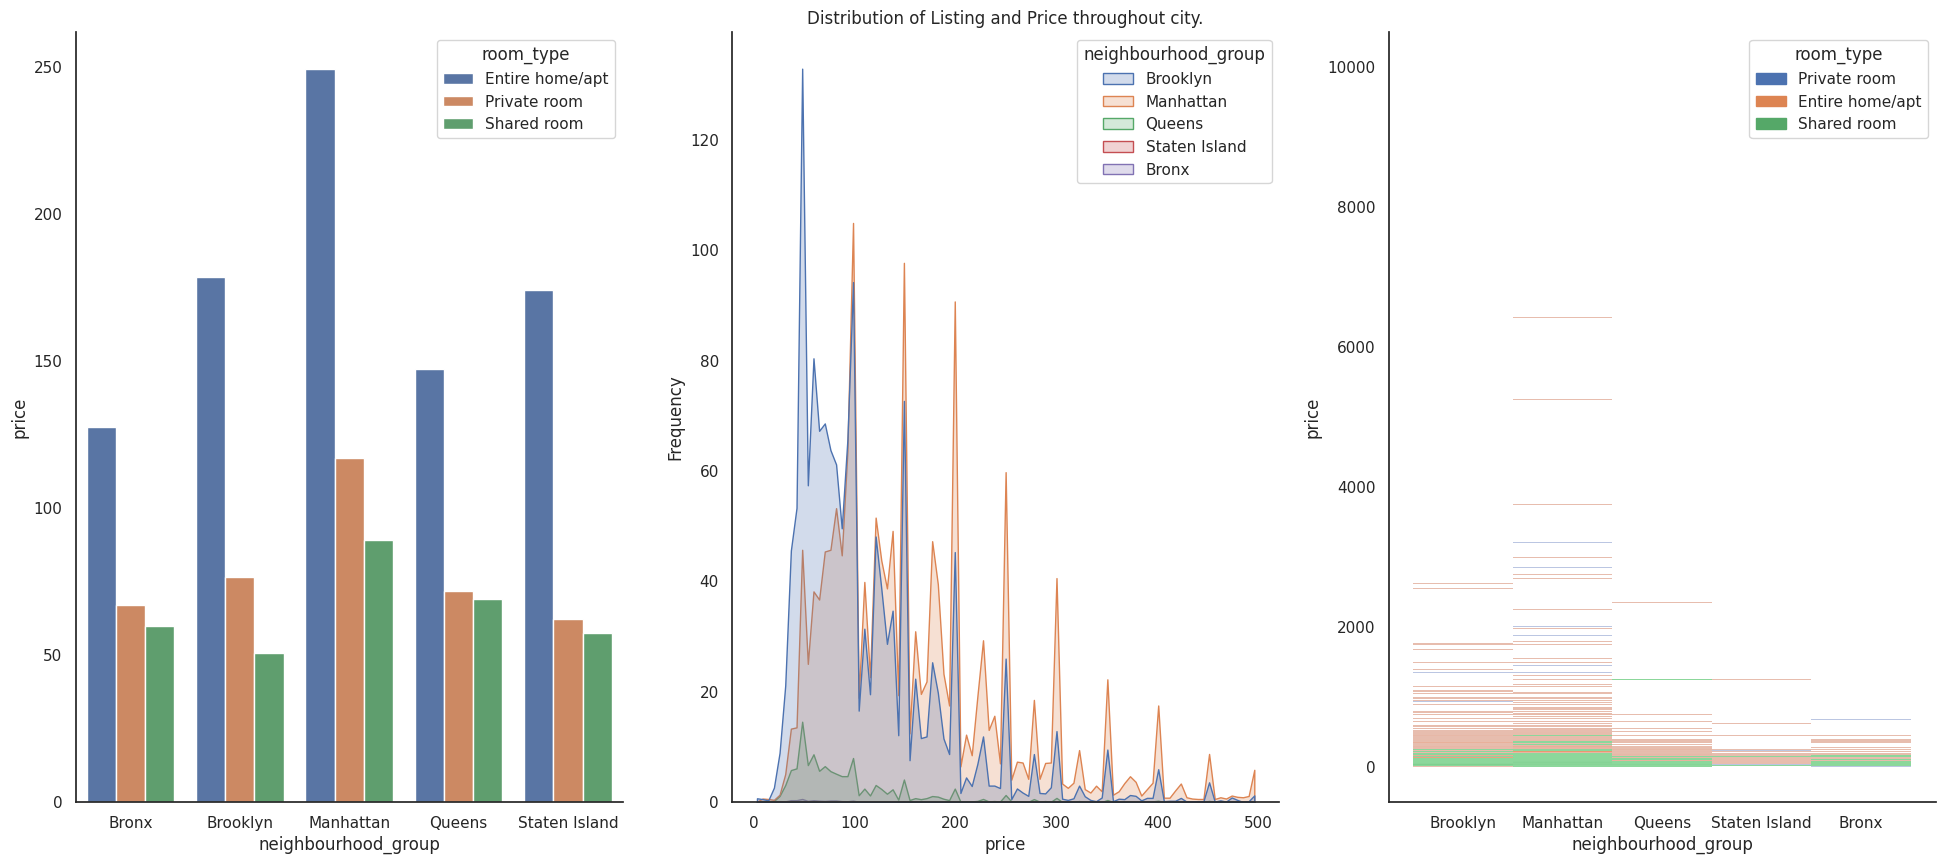

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))
ax = axes.flatten()

# group_price_df = df.groupby('neighbourhood_group')['price'].agg([np.max, np.mean, np.min]).reset_index()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0])

sns.histplot(data=df[df['price'] < 500], x="price", hue="neighbourhood_group", stat='frequency', element='poly', ax=ax[1])
sns.histplot(data=df, x='neighbourhood_group', y='price', hue='room_type', element='poly', ax=ax[2])
ax[1].set_title('Distribution of Listing and Price throughout city.')
sns.despine(fig)

From the above graph, we can understand Brooklyn and Manhattan stands within the most urban and active area, in terms of listing areas and pricing. Manhattan & Brooklyn has highest avg room price, though Staten Island is not far behind. Shared room has relatively low price and also low in count in all the neighbourhood, whilst Manhattan has most number of `Entire home/apt` category, but Brooklyn has most number of `Private room` category.
\
Let's analyse these in terms of `room_category`

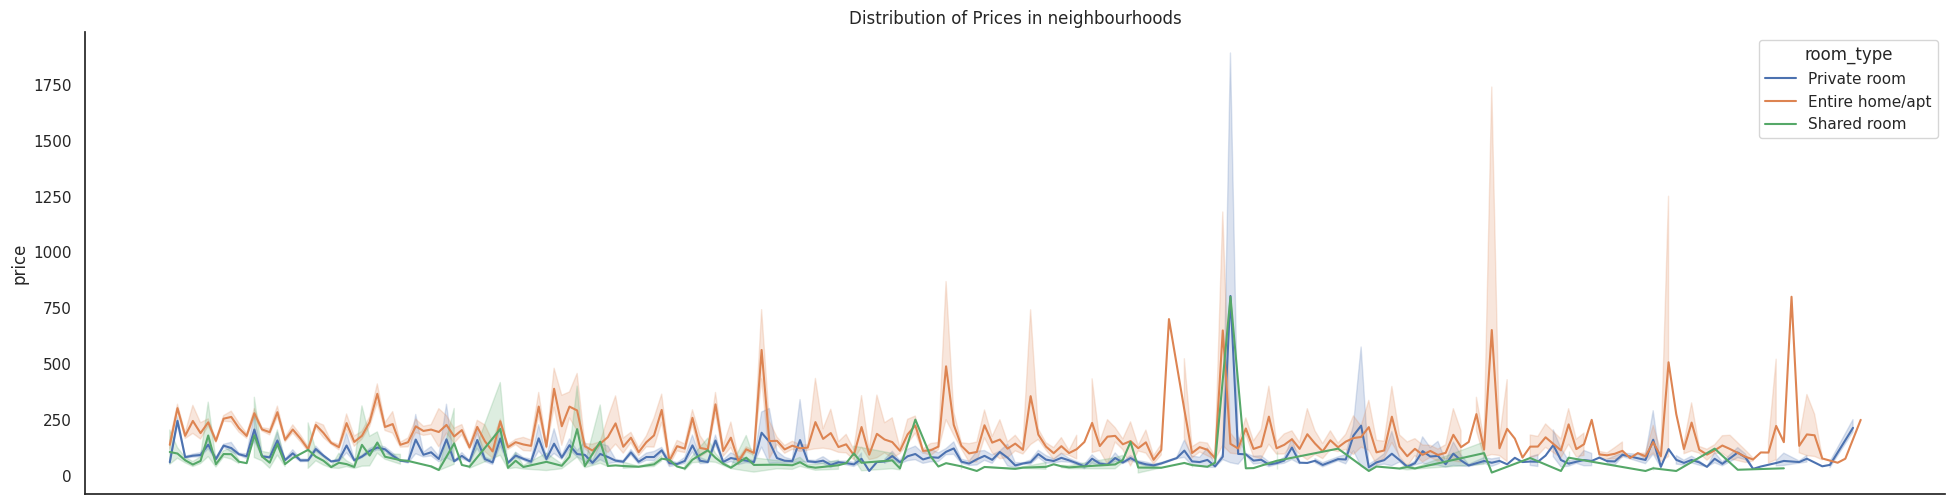

In [ ]:
fig = plt.figure(figsize=(24, 6))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=df, x='neighbourhood', y='price', hue='room_type')
plt.title('Distribution of Prices in neighbourhoods')
sns.despine(fig)

Clearly, room type `Entire home/apt` has maintained higher price range in almost all neighbourhoods.

<ipython-input-24-bcc99d0f604b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])


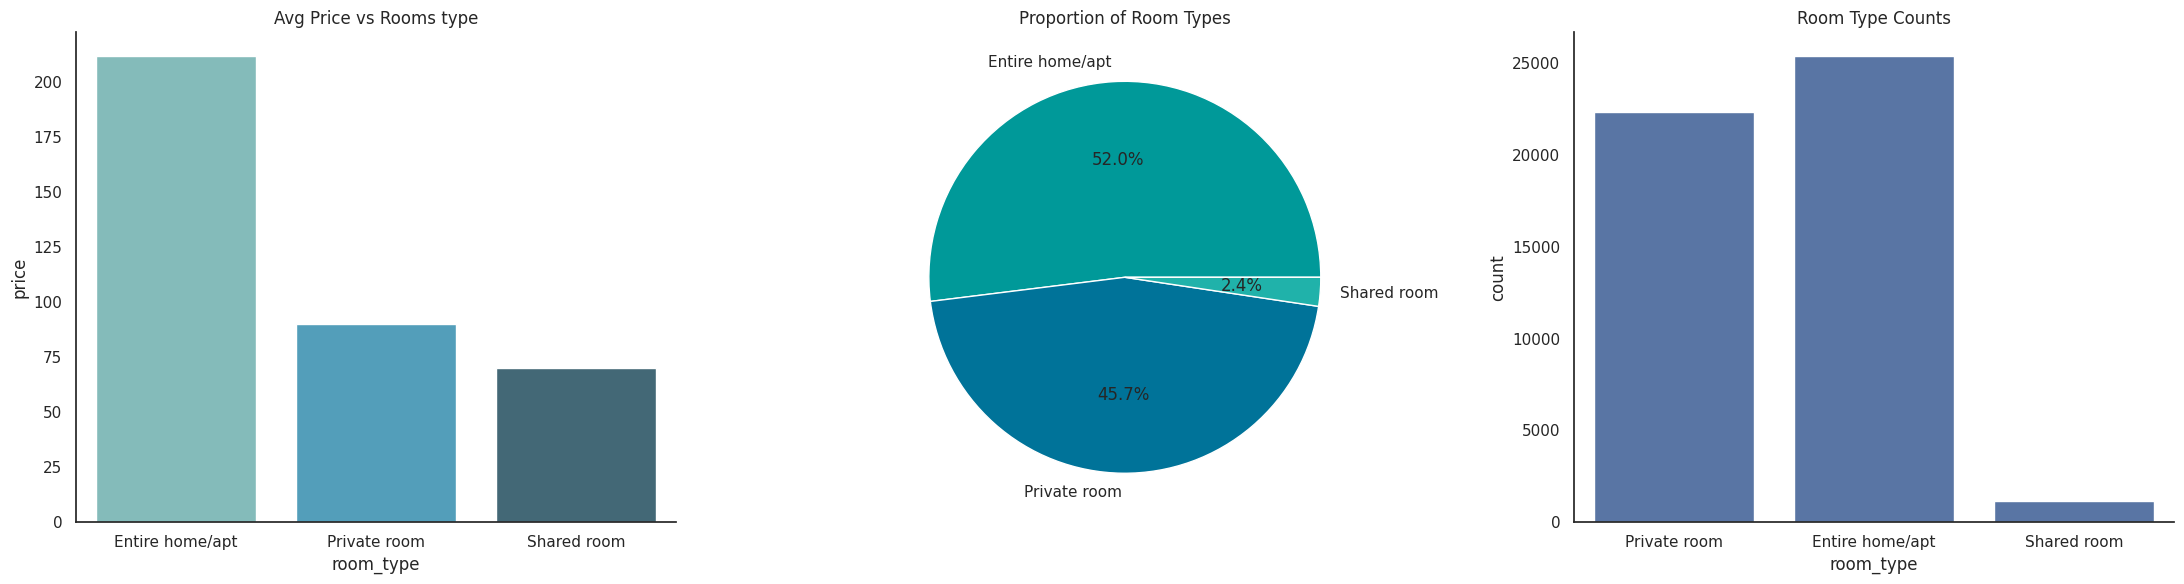

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

`Entire home/apt` has more than 50% proportion in new york city and it too has highest avg price also. `Shared room` are the cheapest, but only has 2.4% proportion. No wonder New York life is of high standard.


---
\
Now we will look into availability varies throughout neighbourhoods, room standards.

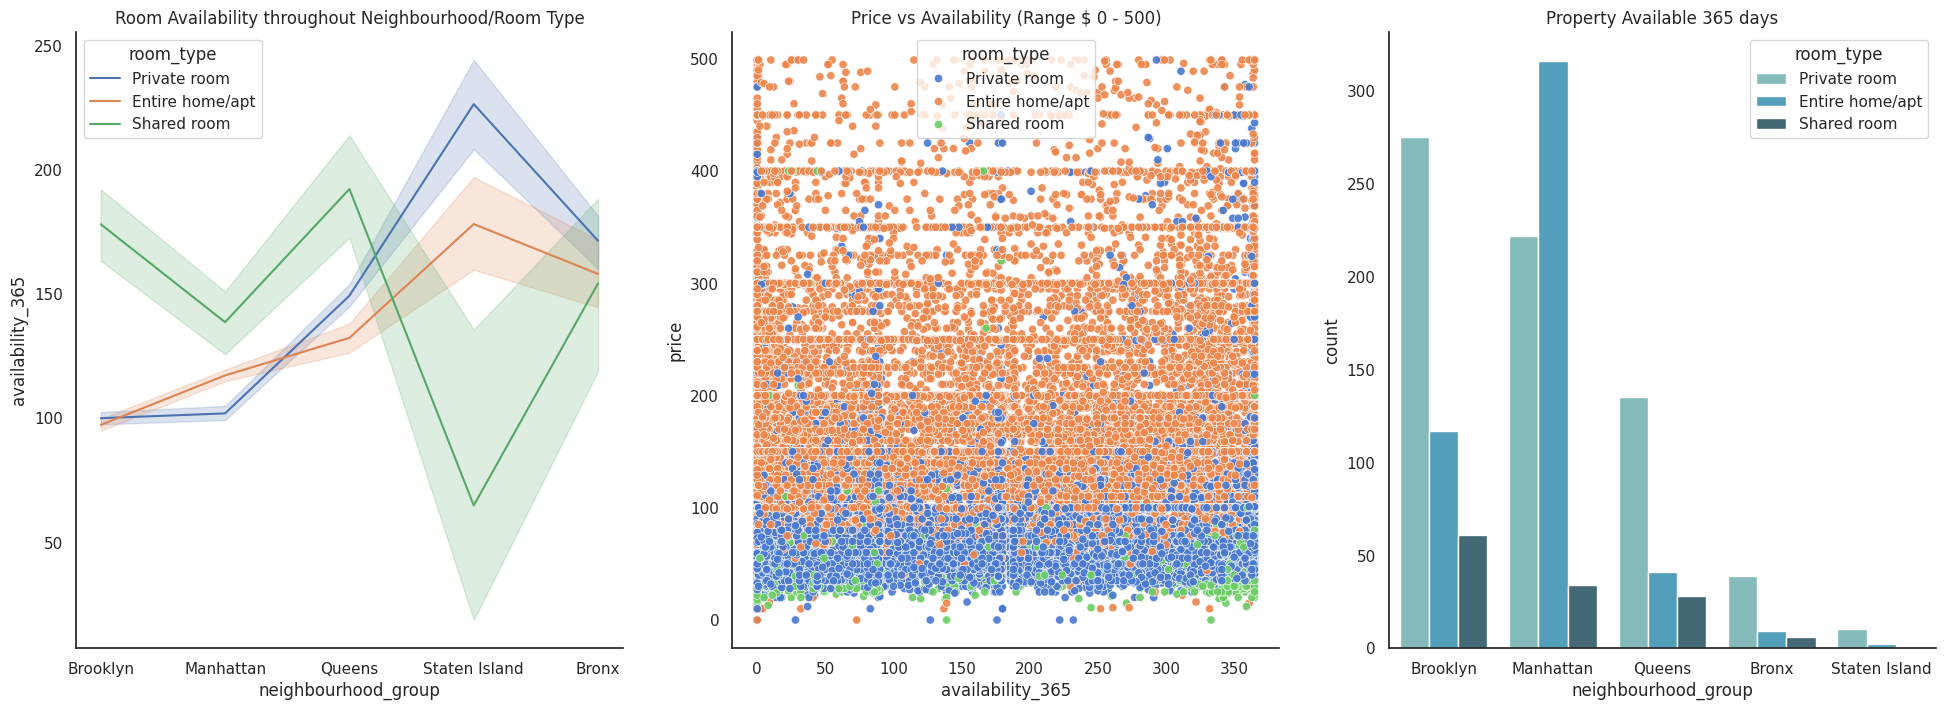

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type', ax=ax[0])
ax[0].set_title('Room Availability throughout Neighbourhood/Room Type')
sns.scatterplot(data=df[df['price'] < 500], x="availability_365", y='price', hue='room_type', alpha=.9, palette="muted", ax=ax[1])
ax[1].set_title('Price vs Availability (Range $ 0 - 500)')

sns.countplot(data=df[df['availability_365']  == 365], x='neighbourhood_group', hue='room_type', palette='GnBu_d', ax=ax[2])
ax[2].set_title('Property Available 365 days')
sns.despine(fig)

From the above two graphs, Staten Island has most busiest Shared Room as well as Most available Private Room. Brroklyn and Manhattan has quite similar availabilities. On the other hand, from Price vs Availability graph, we can notice almost uniform distribution i.e. A particular room type of a particular price range can be available throughout year.
\
Also there are 1295 total properties that are available 365 days a year. Manhattan tops this list with 572 properties while Brooklyn stands at second with 453 properties available.

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df['Days'], df['Month'], df['Years'] = (df['last_review'].dt.day, df['last_review'].dt.month, df['last_review'].dt.year)
df['last_review'] = pd.to_datetime(df['last_review']).dt.date

In [ ]:
# as we've converted to date, null column date becomes system min date i.e. 1970-01-01
# so we're removing these datas
filtered_df = df[df['Years'] != 1970]

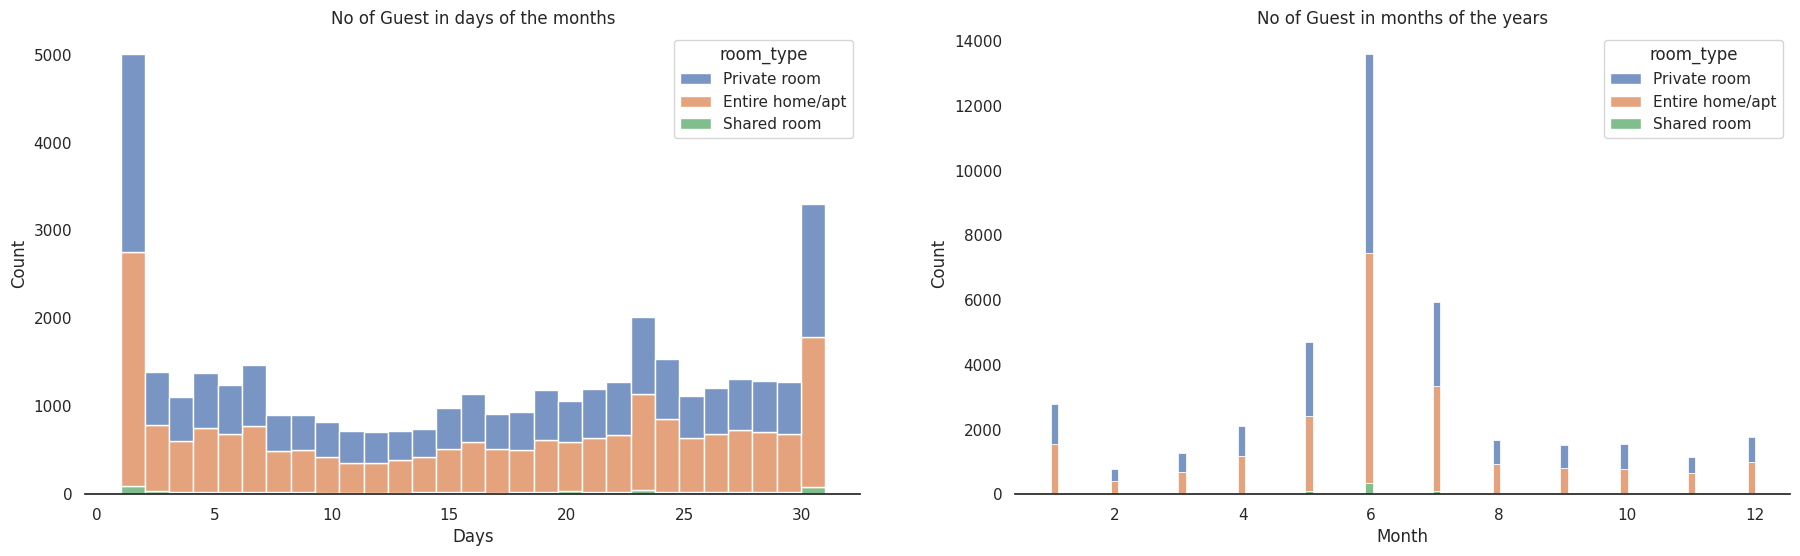

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.histplot(data=filtered_df, x='Days', hue='room_type', multiple="stack", ax=ax[0])
ax[0].set_title('No of Guest in days of the months')
sns.histplot(data=filtered_df, x='Month', hue='room_type', multiple="stack", ax=ax[1])
ax[1].set_title('No of Guest in months of the years')
sns.despine(fig, left=True)

So, we've created day month based on the `last_review` date, though it is not fully accurate many guest prefer to not give a rating (just assumption). We can see a trend where, first day and last day of month most number of guests. Also in the middle of the year, in June Month, there is a surge in guest count.

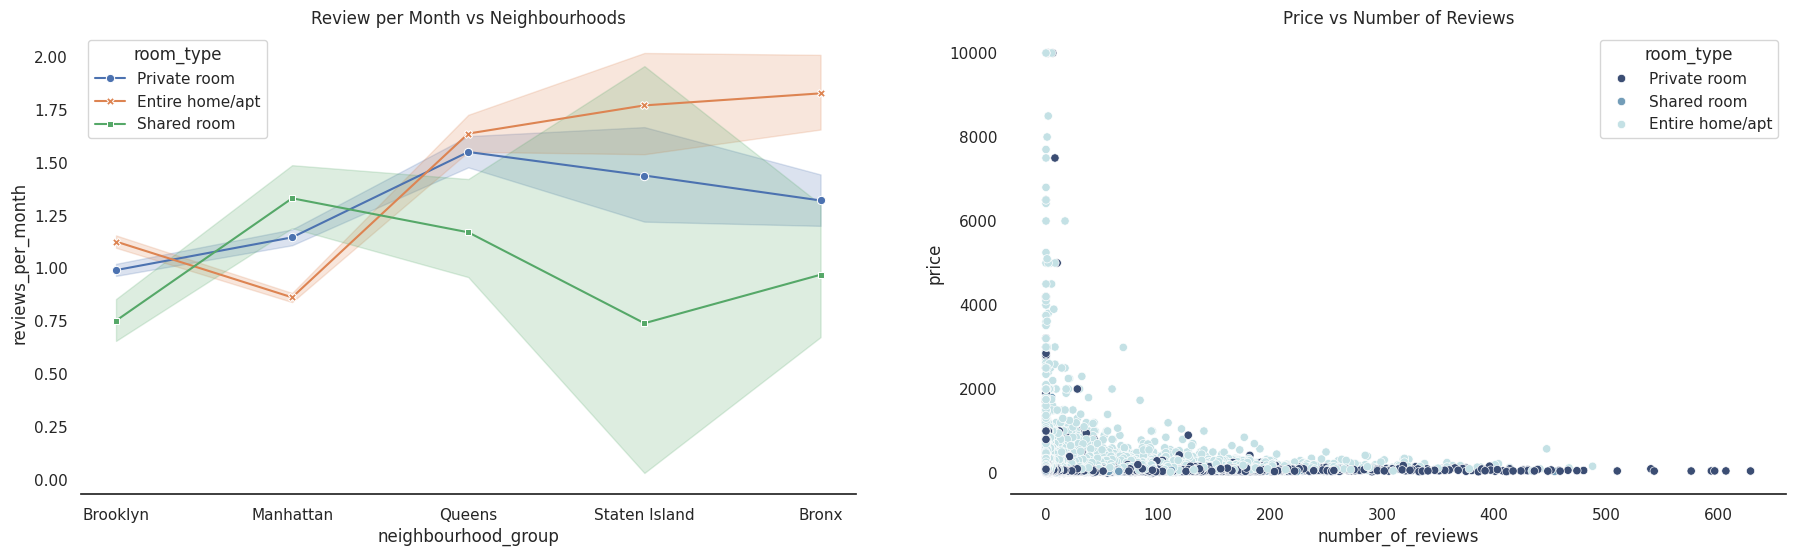

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='reviews_per_month', hue='room_type', style="room_type",
        markers=True, dashes=False, ax=ax[0])
ax[0].set_title('Review per Month vs Neighbourhoods')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r",
        hue_order=['Private room', 'Shared room', 'Entire home/apt'], ax=ax[1])
ax[1].set_title('Price vs Number of Reviews')
sns.despine(fig, left=True)

Brooklyn and Manhattan stands pretty fall in terms of review rate per month. Also, we can notice a negative relation between price & no. of reviews. Where, costlier properties has significantly less no of reviews, but cheaper properties have large number of reviews. Usually, cheaper rooms has more number of guest visits than costlier one, we know no of reviews is directly proportional to no of guests.

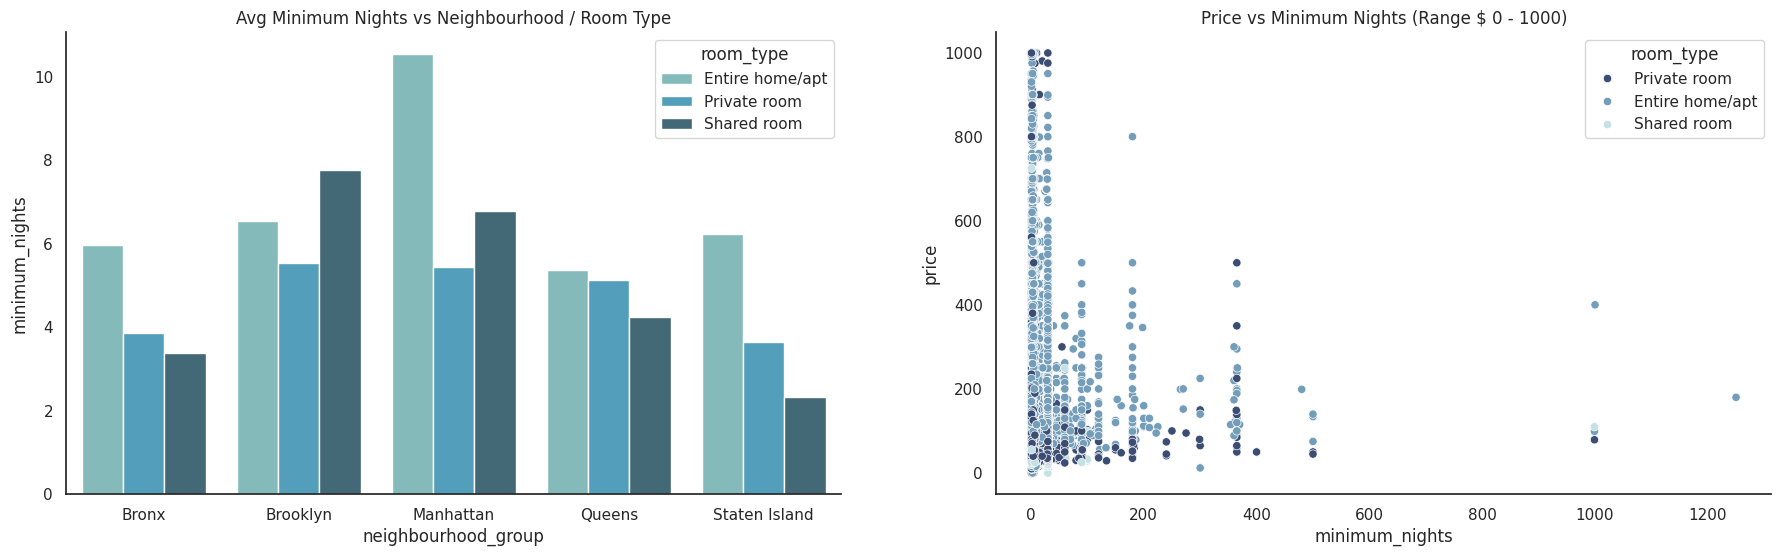

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['minimum_nights']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y='minimum_nights', hue='room_type', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Minimum Nights vs Neighbourhood / Room Type");

sns.scatterplot(data=df[df['price'] < 1000], x='minimum_nights', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r", ax=ax[1])
ax[1].set_title("Price vs Minimum Nights (Range $ 0 - 1000)")

sns.despine(fig)

We can see, the more cost the property has, the more it tends to allow lower number of minimum nights. Within the price range 0 - 200, the minimum nights distribution is ranged between approx 0 - 400 days. But within the price range $ 600 - 1000, avg minimum nights decreased to ~7 nights. But still, we can say most hosts gives less than 10 nights mandatory stay.
\
As a trivia, Manhattan has highest avg minimum night restriction.

## Conclusion

So, this AirBNB dataset is a rich in data but not on features. From the entire above analysis we can conclude that,
* Most visitors don't prefer shared rooms, they tend to visit private room or entire home.
* Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY
* Though location of property has high relation on deciding its price, but a property in popular location doesn't mean it will stay occupied in most of the time.
* Performing a regression on this dataset may result in high error rate, as the features given in this dataset, are of very poor quality in deciding the property valuation. We can see this by looking at corelation heatmap. We would need more features like bedrooms, bathroom, property age (guessed it'd be a very important one), tax_rate applicable on land, room extra amenities, distance to nearest hospital, stores or schoolds. These features might have a high relation with price.
* We could use a time series analysis to make prediction of occupancy rate at particular time of a month, or particular time of a season.
* It'd be a better if we had avg guest ratings of a property, that would be beneficial in understanding the property more and could also be a factor in deciding price (a low rated property tends to lower their price)